# Pymaceuticals Inc.
---

### Analysis

- Three interesting points I found from my analysis of the data are as follows: Ifnubinol had the highest tumor volumes of the four treatments, as wellas the only outlier in the treatments. Additionally, the placebo had more timepopints registered than. Porpriva, which might affect the final statistics. Lastly, it seems that Capomulin loses effectiveness over time, albiet only slightly.
 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
complete_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

mice_count = complete_data["Mouse ID"].value_counts().count()

mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
complete_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

#find duplicate entries and count them
dupe_mice = complete_data[complete_data.duplicated(subset=["Mouse ID", "Timepoint"])]

dupe_mice_count = dupe_mice.shape[0]

#find duplicate ids
dupe_mice_ids = dupe_mice["Mouse ID"].value_counts()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(dupe_mice_count)
print(dupe_mice_ids.index[0])

5
g989


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

dupe_mouse = complete_data.loc[complete_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

clean_comp_data = complete_data[complete_data['Mouse ID'].isin(dupe_mouse)==False]

clean_comp_data.head()

# clean_comp_data = complete_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
# clean_comp_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.

clean_mice_count = clean_comp_data["Mouse ID"].value_counts().count()

clean_mice_count

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

clean_comp_data = complete_data[complete_data['Mouse ID'].isin(dupe_mouse)==False]
cleaned_data = clean_comp_data

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_data = cleaned_data.groupby(["Drug Regimen"])

drug_mean = drug_data[("Tumor Volume (mm3)")].mean()
drug_med = drug_data[("Tumor Volume (mm3)")].median()
drug_var = drug_data[("Tumor Volume (mm3)")].var()
drug_stddev = drug_data[("Tumor Volume (mm3)")].std()
drug_sem = drug_data[("Tumor Volume (mm3)")].sem()


summary_stats = pd.DataFrame({'Mean': drug_mean, 'Median': drug_med, 'Standard Deviation': drug_stddev, 'SEM': drug_sem})

summary_stats.head()


,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

clean_comp_data = complete_data[complete_data['Mouse ID'].isin(dupe_mouse)==False]

# Using the aggregation method, produce the same summary statistics in a single line

agg_stats = clean_comp_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename columns for clarity

agg_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

agg_stats.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

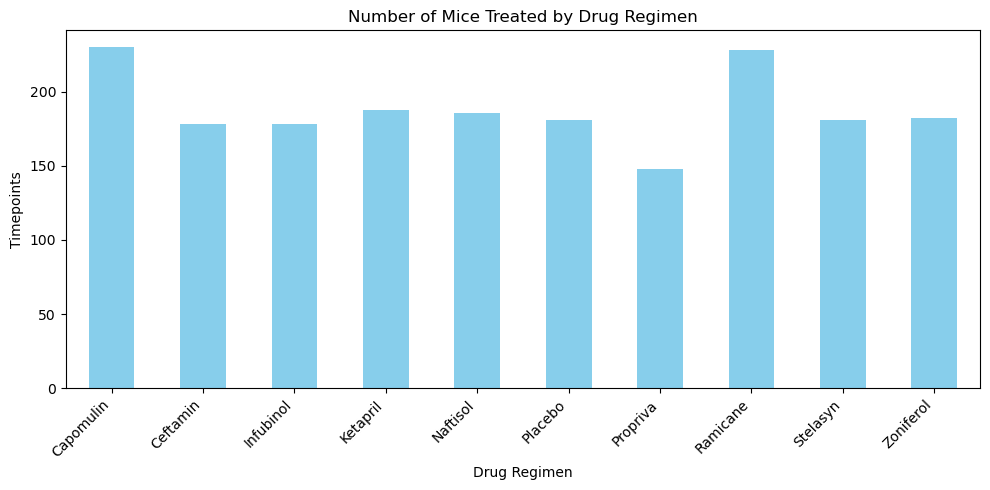

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_bar_chart = clean_comp_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

#set up the chart with pandas plot function
plt.figure(figsize=(10, 5))
mice_bar_chart.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.title("Number of Mice Treated by Drug Regimen")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


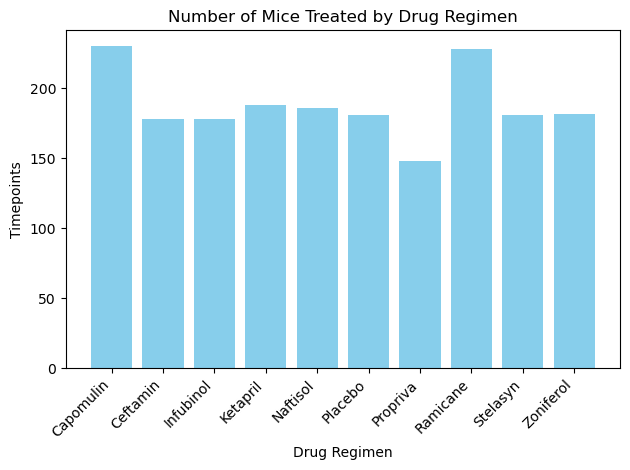

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mice_bar_chart = clean_comp_data.groupby(["Drug Regimen"]).count()["Mouse ID"]


x = mice_bar_chart.index
y = mice_bar_chart.values

# Plot the bars
plt.bar(x, y, color='skyblue')

# Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.title("Number of Mice Treated by Drug Regimen")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

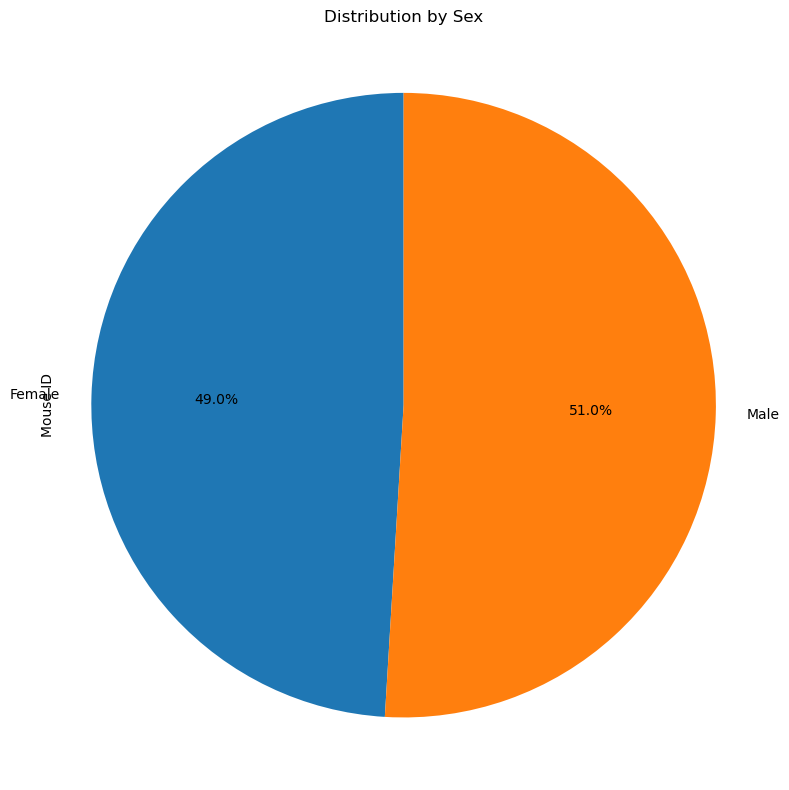

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_pie_chart = clean_comp_data.groupby(["Sex"]).count()["Mouse ID"]

plt.figure(figsize=(8, 8))
mice_pie_chart.plot(kind='pie', autopct="%1.1f%%", startangle=90)

# Add title
plt.title('Distribution by Sex')

# Ensure the plot is circular
plt.axis('equal')

# Show plot
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution by Sex')

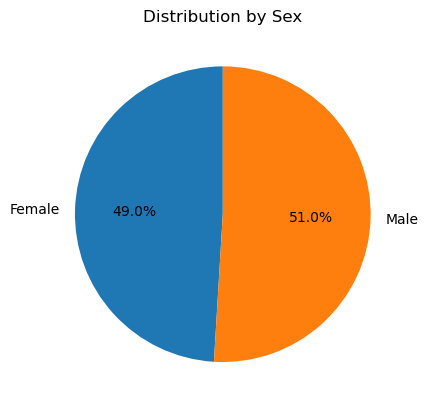

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_pie_chart = clean_comp_data.groupby(["Sex"]).count()["Mouse ID"]

#create the pie chart
plt.pie(mice_pie_chart, labels=mice_pie_chart.index.values, autopct="%1.1f%%", startangle=90)

plt.title('Distribution by Sex')

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time = clean_comp_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
time_df = last_time.merge(clean_comp_data,on=['Mouse ID','Timepoint'], how='left')
print(time_df.head())

treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for name in range(len(treatment_names)):
    temp = time_df[time_df['Drug Regimen'] == treatment_names[name]]

  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a262         45      Placebo  Female          17          29   
3     a275         45     Ceftamin  Female          20          28   
4     a366         30     Stelasyn  Female          16          29   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           70.717621                 4  
3           62.999356                 3  
4           63.440686                 1  


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumvol_data = {'Capomulin': [],
                'Ramicane': [],
                'Infubinol': [], 
                'Ceftamin': []}
# Assuming you have obtained the final tumor volume data for each treatment regimen

# Iterate through each treatment regimen
for name in treatment_names:
    # Get the final tumor volume data for the current treatment regimen
    tumor_volume = time_df.loc[time_df['Drug Regimen'] == name, 'Tumor Volume (mm3)']
    
    # Calculate quartiles and IQR
    quartiles = tumor_volume.quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1
    
    # Find potential outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    # Print results
    print(f"----- {name} -----")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("Potential outliers:")
    if not outliers.empty:
        print(outliers)
    else:
        print("None")
    print("\n")



----- Capomulin -----
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential outliers:
None


----- Ramicane -----
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential outliers:
None


----- Infubinol -----
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64


----- Ceftamin -----
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential outliers:
None




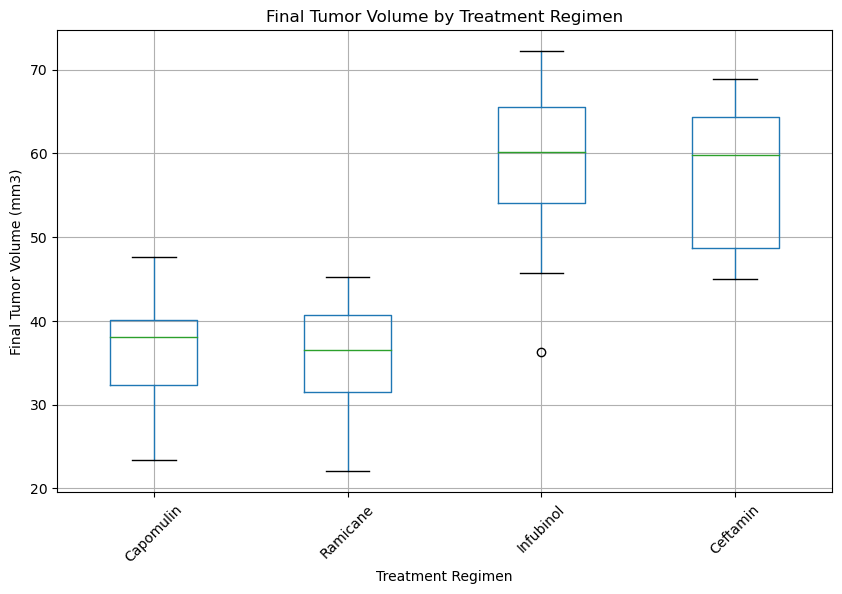

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volume_df = pd.DataFrame({name: time_df.loc[time_df['Drug Regimen'] == name, 'Tumor Volume (mm3)'] for name in treatment_names})

# Plotting the box plot using pandas
plt.figure(figsize=(10, 6))
tumor_volume_df.boxplot()
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Volume by Treatment Regimen')
plt.xticks(rotation=45)
plt.show()

## Line and Scatter Plots

<Figure size 1000x600 with 0 Axes>

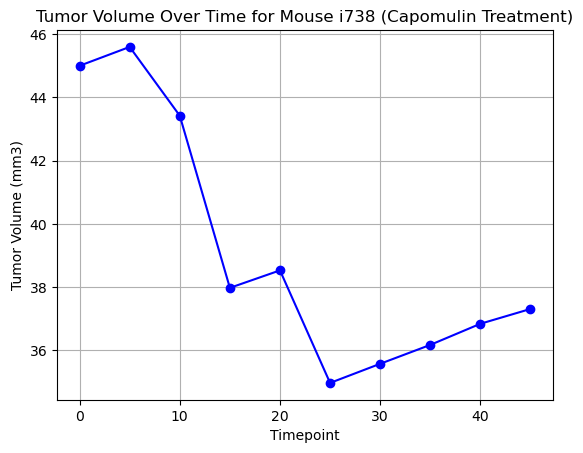

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = clean_comp_data[clean_comp_data['Drug Regimen']== 'Capomulin']

# Pick a mouse
test_mouse = capomulin.loc[capomulin['Mouse ID'] == 'i738']

#make the line plot
plt.figure(figsize=(10, 6))
test_mouse.plot(x='Timepoint', y='Tumor Volume (mm3)', marker='o', color='b', linestyle='-', legend=False)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Over Time for Mouse i738 (Capomulin Treatment)')
plt.grid(True)
plt.show()

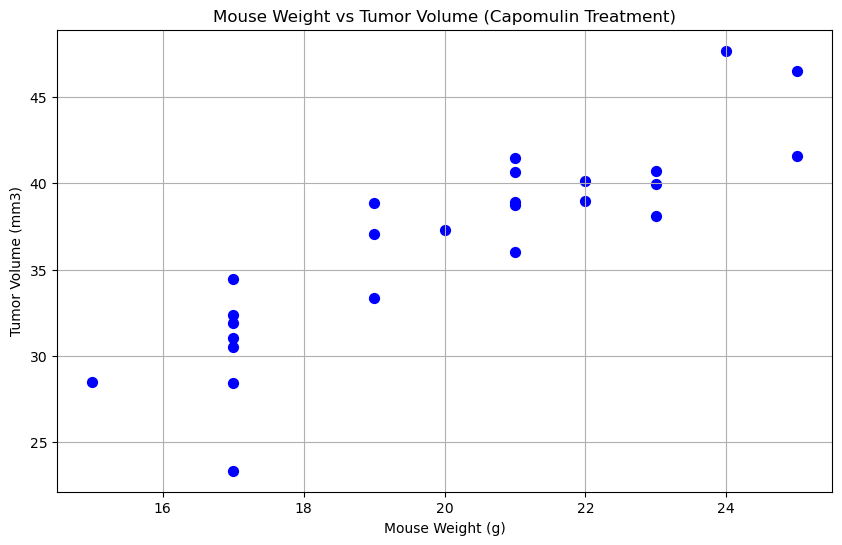

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
clean_comp_data = complete_data[complete_data['Mouse ID'].isin(dupe_mouse)==False]
capomulin = clean_comp_data[clean_comp_data['Drug Regimen']== 'Capomulin']

clean_cap_df = capomulin.drop_duplicates(subset=['Mouse ID','Weight (g)'], keep='last')
weight_cap = clean_cap_df['Weight (g)']

#create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(clean_cap_df['Weight (g)'], clean_cap_df['Tumor Volume (mm3)'], color='b', marker='o', s=50)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs Tumor Volume (Capomulin Treatment)')
plt.grid(True)
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.8767060403658116


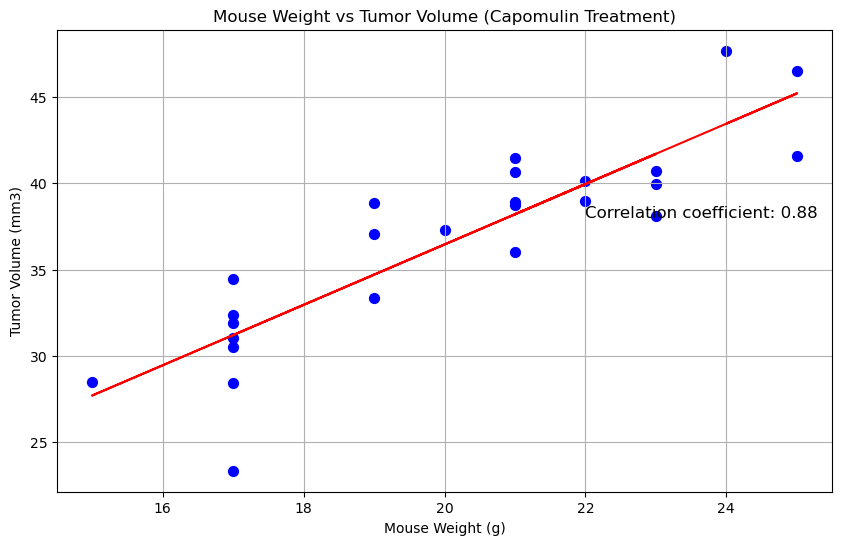

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = stats.pearsonr(clean_cap_df['Weight (g)'], clean_cap_df['Tumor Volume (mm3)'])[0]
print("Correlation Coefficient:", correlation_coefficient)

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(clean_cap_df['Weight (g)'], clean_cap_df['Tumor Volume (mm3)'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(clean_cap_df['Weight (g)'], clean_cap_df['Tumor Volume (mm3)'], color='b', marker='o', s=50)

# Plot the linear regression line
plt.plot(clean_cap_df['Weight (g)'], slope * clean_cap_df['Weight (g)'] + intercept, color='r', linestyle='-')

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs Tumor Volume (Capomulin Treatment)')

# Add correlation coefficient to the plot
plt.text(22, 38, f'Correlation coefficient: {correlation_coefficient:.2f}', fontsize=12, color='black')

plt.grid(True)
plt.show()